# POD vector space tutorial

In this tutorial you will learn:


- How to construct a vector space using proper orthogonal decomposition


- How to use a truncater

## Modules

Here are the relevant modules for this example.

In [22]:
%%capture
import romtools
import numpy as np
from matplotlib import pyplot as plt
from romtools import vector_space

## Snapshots
First, we load in snapshots from a FOM. We use pre-computed snapshots of the [1D Euler equations](https://pressio.github.io/pressio-demoapps/euler_1d_smooth.html) obtained using pressio-demo-apps.

In [23]:
snapshots = np.load('snapshots.npz')['snapshots']

# The snapshots are in tensor form:
n_vars, nx, nt = snapshots.shape

Note that romtools works with [tensor forms](https://pressio.github.io/rom-tools-and-workflows/romtools/vector_space.html).

## Basis Creation

Next, we make a dictionary basis (with no truncation) that uses the first vector as an affine offset.

We create a ["shifter"](https://pressio.github.io/rom-tools-and-workflows/romtools/vector_space/utils/shifter.html) that is responsible for shifting snapshots.

In [24]:
my_shifter = vector_space.utils.create_firstvec_shifter(snapshots)


Then, we create a [truncater](https://pressio.github.io/rom-tools-and-workflows/romtools/vector_space/utils/truncater.html) that controls for how we want to truncate our basis. We use here an energy-based criterion setting the number of modes to capture 99.9% of the cumulative energy.

In [25]:
my_truncater = vector_space.utils.EnergyBasedTruncater(0.999)

We then construct an affine vector space using POD with our shifter and truncater.
Note that we don't use the first snapshot in the vector space since this is the affine offset

In [26]:
my_affine_vector_space = vector_space.VectorSpaceFromPOD(snapshots[...,1::],truncater=my_truncater,shifter=my_shifter)


We do not do a deep copy of the snapshot matrix for performance reasons. Once a snapshot tensor is passed, we modify the data in place. 

We can grab the basis and shift vector from our defined `VectorSpace` function.

In [27]:
basis = my_affine_vector_space.get_basis()
shift_vector = my_affine_vector_space.get_shift_vector()



Now, let us view the first basis mode for density.

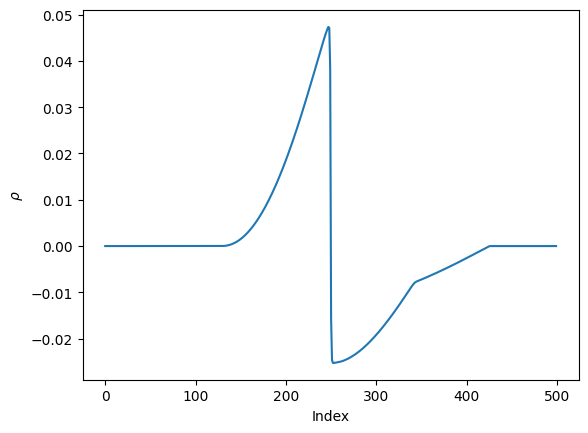

In [28]:
#We can look at the density component of the first basis:
plt.plot(basis[0,:,0])
plt.xlabel(r'Index')
plt.ylabel(r'$\rho$')
plt.show()

And let us check the dimension of the vector space.

In [29]:
print("The dimension of the vector space is " , my_affine_vector_space.extents())
print("The number of basis vectors in my vector space is " , my_affine_vector_space.extents()[-1])

The dimension of the vector space is  (3, 500, 30)
The number of basis vectors in my vector space is  30


We can also check whether the basis is orthonormal.

In [30]:
is_identity = np.einsum('ijk,ijl->kl',basis,basis)
assert(np.allclose(is_identity,np.eye(30)))